# BUSINESS CASE

#####  * INX Future Inc , (referred as INX ) , is one of the leading data analytics and automation solutions providerwith over 15 years of global business presence. INX is consistently rated as top 20 best employers past 5years. INX human resource policies are considered as employee friendly and widely perceived as bestpractices in the industry
#####  * Recent years, the employee performance indexes are not healthy and this is becoming a growingconcerns among the top management. There has been increased escalations on service delivery andclient satisfaction levels came down by 8 percentage points.
##### *  Mr. Brain decided to initiate a data science project , which analyses the current employee data and findthe core underlying causes of this performance issues. Mr. Brain, being a data scientist himself, expectsthe findings of this project will help him to take right course of actions. He also expects a clear indicatorsof non performing employees, so that any penalization of non-performing employee, if required, maynot significantly affect other employee morals.


#### Expected Outputs From Project
1. Department wise performances
2. Top 3 Important Factors effecting employee performance
3. A trained model which can predict the employee performance based on factors as inputs. This will be used to hire employees
4. Recommendations to improve the employee performance based on insights from analysis.

## Importing of Required Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

from scipy import stats
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score,f1_score,recall_score,classification_report,precision_score
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.datasets import make_classification

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

## Importing of Data 

In [2]:
data = pd.read_excel('INX_Future_Inc_Employee_Performance_CDS_Project2_Data_V1.8.xls')

In [3]:
data

EmpNumber  Age  Gender EducationBackground MaritalStatus  \
0     E1001000   32    Male           Marketing        Single   
1     E1001006   47    Male           Marketing        Single   
2     E1001007   40    Male       Life Sciences       Married   
3     E1001009   41    Male     Human Resources      Divorced   
4     E1001010   60    Male           Marketing        Single   
...        ...  ...     ...                 ...           ...   
1195   E100992   27  Female             Medical      Divorced   
1196   E100993   37    Male       Life Sciences        Single   
1197   E100994   50    Male             Medical       Married   
1198   E100995   34  Female             Medical        Single   
1199   E100998   24  Female       Life Sciences        Single   

        EmpDepartment        EmpJobRole BusinessTravelFrequency  \
0               Sales   Sales Executive           Travel_Rarely   
1               Sales   Sales Executive           Travel_Rarely   
2               Sales   Sales Executive       Travel_Frequently   
3     Human Resources           Manager           Travel_Rarely   
4               Sales   Sales Executive           Travel_Rarely   
...               ...               ...                     ...   
1195            Sales   Sales Executive       Travel_Frequently   
1196      Development  Senior Developer           Travel_Rarely   
1197      Development  Senior Developer           Travel_Rarely   
1198     Data Science    Data Scientist           Travel_Rarely   
1199            Sales   Sales Executive           Travel_Rarely   

      DistanceFromHome  EmpEducationLevel  ...  EmpRelationshipSatisfaction  \
0                   10                  3  ...                            4   
1                   14                  4  ...                            4   
2                    5                  4  ...                            3   
3                   10                  4  ...                            2   
4                   16                  4  ...                            4   
...                ...                ...  ...                          ...   
1195                 3                  1  ...                            2   
1196                10                  2  ...                            1   
1197                28                  1  ...                            3   
1198                 9                  3  ...                            2   
1199                 3                  2  ...                            1   

      TotalWorkExperienceInYears  TrainingTimesLastYear  EmpWorkLifeBalance  \
0                             10                      2                   2   
1                             20                      2                   3   
2                             20                      2                   3   
3                             23                      2                   2   
4                             10                      1                   3   
...                          ...                    ...                 ...   
1195                           6                      3                   3   
1196                           4                      2                   3   
1197                          20                      3                   3   
1198                           9                      3                   4   
1199                           4                      3                   3   

      ExperienceYearsAtThisCompany  ExperienceYearsInCurrentRole  \
0                               10                             7   
1                                7                             7   
2                               18                            13   
3                               21                             6   
4                                2                             2   
...                            ...                           ...   
1195                             6           

In [4]:
data

EmpNumber  Age  Gender EducationBackground MaritalStatus  \
0     E1001000   32    Male           Marketing        Single   
1     E1001006   47    Male           Marketing        Single   
2     E1001007   40    Male       Life Sciences       Married   
3     E1001009   41    Male     Human Resources      Divorced   
4     E1001010   60    Male           Marketing        Single   
...        ...  ...     ...                 ...           ...   
1195   E100992   27  Female             Medical      Divorced   
1196   E100993   37    Male       Life Sciences        Single   
1197   E100994   50    Male             Medical       Married   
1198   E100995   34  Female             Medical        Single   
1199   E100998   24  Female       Life Sciences        Single   

        EmpDepartment        EmpJobRole BusinessTravelFrequency  \
0               Sales   Sales Executive           Travel_Rarely   
1               Sales   Sales Executive           Travel_Rarely   
2               Sales   Sales Executive       Travel_Frequently   
3     Human Resources           Manager           Travel_Rarely   
4               Sales   Sales Executive           Travel_Rarely   
...               ...               ...                     ...   
1195            Sales   Sales Executive       Travel_Frequently   
1196      Development  Senior Developer           Travel_Rarely   
1197      Development  Senior Developer           Travel_Rarely   
1198     Data Science    Data Scientist           Travel_Rarely   
1199            Sales   Sales Executive           Travel_Rarely   

      DistanceFromHome  EmpEducationLevel  ...  EmpRelationshipSatisfaction  \
0                   10                  3  ...                            4   
1                   14                  4  ...                            4   
2                    5                  4  ...                            3   
3                   10                  4  ...                            2   
4                   16                  4  ...                            4   
...                ...                ...  ...                          ...   
1195                 3                  1  ...                            2   
1196                10                  2  ...                            1   
1197                28                  1  ...                            3   
1198                 9                  3  ...                            2   
1199                 3                  2  ...                            1   

      TotalWorkExperienceInYears  TrainingTimesLastYear  EmpWorkLifeBalance  \
0                             10                      2                   2   
1                             20                      2                   3   
2                             20                      2                   3   
3                             23                      2                   2   
4                             10                      1                   3   
...                          ...                    ...                 ...   
1195                           6                      3                   3   
1196                           4                      2                   3   
1197                          20                      3                   3   
1198                           9                      3                   4   
1199                           4                      3                   3   

      ExperienceYearsAtThisCompany  ExperienceYearsInCurrentRole  \
0                               10                             7   
1                                7                             7   
2                               18                            13   
3                               21                             6   
4                                2                             2   
...                            ...                           ...   
1195                             6           

## DataSet Description

* **DataShape** : The data has 27 input variables and 1 quantitative output variable and 1200 instances.
* **Numerical Columns** : Age,DistanceFromHome,EmpEducationLevel,EmpEnvironmentSatisfaction,EmpHourlyRate,EmpJobInvolvement,EmpJobLevel,EmpJobSatisfaction,NumCompaniesWorked,EmpLastSalaryHikePercent,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearAtThisCompany,'ExperienceYearsInCurrentRole,YearSincePromotion,YearWithCurrManager,PerformanceRating.
* **Categoriacal Columns** : EmpNumber,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,OverTime,Attrition.

In [5]:
data.columns

Index(['EmpNumber', 'Age', 'Gender', 'EducationBackground', 'MaritalStatus',
       'EmpDepartment', 'EmpJobRole', 'BusinessTravelFrequency',
       'DistanceFromHome', 'EmpEducationLevel', 'EmpEnvironmentSatisfaction',
       'EmpHourlyRate', 'EmpJobInvolvement', 'EmpJobLevel',
       'EmpJobSatisfaction', 'NumCompaniesWorked', 'OverTime',
       'EmpLastSalaryHikePercent', 'EmpRelationshipSatisfaction',
       'TotalWorkExperienceInYears', 'TrainingTimesLastYear',
       'EmpWorkLifeBalance', 'ExperienceYearsAtThisCompany',
       'ExperienceYearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager', 'Attrition', 'PerformanceRating'],
      dtype='object')

## Data Attributes
1. **EmpNumber**: Employee identification number.
2. **Age**: Age of the employee.
3. **Gender**: Gender of the employee (e.g., Male, Female).
4. **EducationBackground**: Educational background of the employee (e.g., Marketing, Human Resources, Technical Degree).
5. **MaritalStatus**: Marital status of the employee (e.g., Single, Married, Divorced).
6. **EmpDepartment**: Department in which the employee works (e.g., Sales, Human Resources, Research & Development).
7. **EmpJobRole**: Job role of the employee within the department.
8. **BusinessTravelFrequency**: Frequency of business travel for the employee (e.g., Rarely, Frequently, Non-Travel).
9. **DistanceFromHome**: Distance from home to workplace.
10. **EmpEducationLevel**: Education level of the employee.
11. **EmpEnvironmentSatisfaction**: Satisfaction level of the employee with the work environment.
12. **EmpHourlyRate**: Hourly rate of the employee's salary.
13. **EmpJobInvolvement**: Level of involvement of the employee in their job.
14. **EmpJobLevel**: Job level of the employee.
15. **EmpJobSatisfaction**: Satisfaction level of the employee with their job.
16. **NumCompaniesWorked**: Number of companies the employee has worked for.
17. **OverTime**: Whether the employee works overtime or not.
18. **EmpLastSalaryHikePercent**: Percentage of the last salary hike for the employee.
19. **EmpRelationshipSatisfaction**: Satisfaction level of the employee with their relationships at work.
20. **TotalWorkExperienceInYears**: Total work experience of the employee in years.
21. **TrainingTimesLastYear**: Number of training sessions attended by the employee last year.
22. **EmpWorkLifeBalance**: Work-life balance rating of the employee.
23. **ExperienceYearsAtThisCompany**: Years of experience at the current company.
24. **ExperienceYearsInCurrentRole**: Years of experience in the current role.
25. **YearsSinceLastPromotion**: Years since the employee's last promotion.
26. **YearsWithCurrManager**: Years the employee has been with the current manager.
27. **Attrition**: Whether the employee has left the company or not.
28. **PerformanceRating**: Performance rating of the employee.

## Project Process Steps
* Importing all the necessary libraries
* Understanding the data/ Insights from data
* Exploratory Data Analysis (EDA)
* Data Pre-processing
* Feature Selection
* Model Creation and Evaluation
* Conclusion

## Understanding The Data


In [6]:
# Describing of Data
data.describe()

Age  DistanceFromHome  EmpEducationLevel  \
count  1200.000000       1200.000000         1200.00000   
mean     36.918333          9.165833            2.89250   
std       9.087289          8.176636            1.04412   
min      18.000000          1.000000            1.00000   
25%      30.000000          2.000000            2.00000   
50%      36.000000          7.000000            3.00000   
75%      43.000000         14.000000            4.00000   
max      60.000000         29.000000            5.00000   

       EmpEnvironmentSatisfaction  EmpHourlyRate  EmpJobInvolvement  \
count                 1200.000000    1200.000000        1200.000000   
mean                     2.715833      65.981667           2.731667   
std                      1.090599      20.211302           0.707164   
min                      1.000000      30.000000           1.000000   
25%                      2.000000      48.000000           2.000000   
50%                      3.000000      66.000000           3.000000   
75%                      4.000000      83.000000           3.000000   
max                      4.000000     100.000000           4.000000   

       EmpJobLevel  EmpJobSatisfaction  NumCompaniesWorked  \
count  1200.000000         1200.000000         1200.000000   
mean      2.067500            2.732500            2.665000   
std       1.107836            1.100888            2.469384   
min       1.000000            1.000000            0.000000   
25%       1.000000            2.000000            1.000000   
50%       2.000000            3.000000            2.000000   
75%       3.000000            4.000000            4.000000   
max       5.000000            4.000000            9.000000   

       EmpLastSalaryHikePercent  EmpRelationshipSatisfaction  \
count               1200.000000                  1200.000000   
mean                  15.222500                     2.725000   
std                    3.625918                     1.075642   
min                   11.000000                     1.000000   
25%                   12.000000                     2.000000   
50%                   14.000000                     3.000000   
75%                   18.000000                     4.000000   
max                   25.000000                     4.000000   

       TotalWorkExperienceInYears  TrainingTimesLastYear  EmpWorkLifeBalance  \
count                 1200.000000            1200.000000         1200.000000   
mean                    11.330000               2.785833            2.744167   
std                      7.797228               1.263446            0.699374   
min                      0.000000               0.000000            1.000000   
25%                      6.000000               2.000000            2.000000   
50%                     10.000000               3.000000            3.000000   
75%                     15.000000               3.000000            3.000000   
max                     40.000000               6.000000            4.000000   

       ExperienceYearsAtThisCompany  ExperienceYearsInCurrentRole  \
count                   1200.000000                   1200.000000   
mean                       7.077500                      4.291667   
std                        6.236899                      3.613744   
min                        0.000000                      0.000000   
25%                        3.000000                      2.000000   
50%                        5.000000                      3.000000   
75%                       10.000000                      7.000000   
max                       40.000000                     18.000000   

       YearsSinceLastPromotion  YearsWithCurrManager  PerformanceRating  
count              1200.000000           1200.000000        1200.000000  
mean                  2.194167              4.105000           2.948333  
std                   3.221560              3.541576           0.518866  
min                   0.000000              0.000000           2.000

In [7]:
# Describing of categorical columns
data.describe(include='O')

EmpNumber Gender EducationBackground MaritalStatus EmpDepartment  \
count       1200   1200                1200          1200          1200   
unique      1200      2                   6             3             6   
top     E1001000   Male       Life Sciences       Married         Sales   
freq           1    725                 492           548           373   

             EmpJobRole BusinessTravelFrequency OverTime Attrition  
count              1200                    1200     1200      1200  
unique               19                       3        2         2  
top     Sales Executive           Travel_Rarely       No        No  
freq                270                     846      847      1022

In [8]:
# Getting of information of each column
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 28 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   EmpNumber                     1200 non-null   object
 1   Age                           1200 non-null   int64 
 2   Gender                        1200 non-null   object
 3   EducationBackground           1200 non-null   object
 4   MaritalStatus                 1200 non-null   object
 5   EmpDepartment                 1200 non-null   object
 6   EmpJobRole                    1200 non-null   object
 7   BusinessTravelFrequency       1200 non-null   object
 8   DistanceFromHome              1200 non-null   int64 
 9   EmpEducationLevel             1200 non-null   int64 
 10  EmpEnvironmentSatisfaction    1200 non-null   int64 
 11  EmpHourlyRate                 1200 non-null   int64 
 12  EmpJobInvolvement             1200 non-null   int64 
 13  EmpJobLevel       


## EDA
### 1. Univariate Analysis

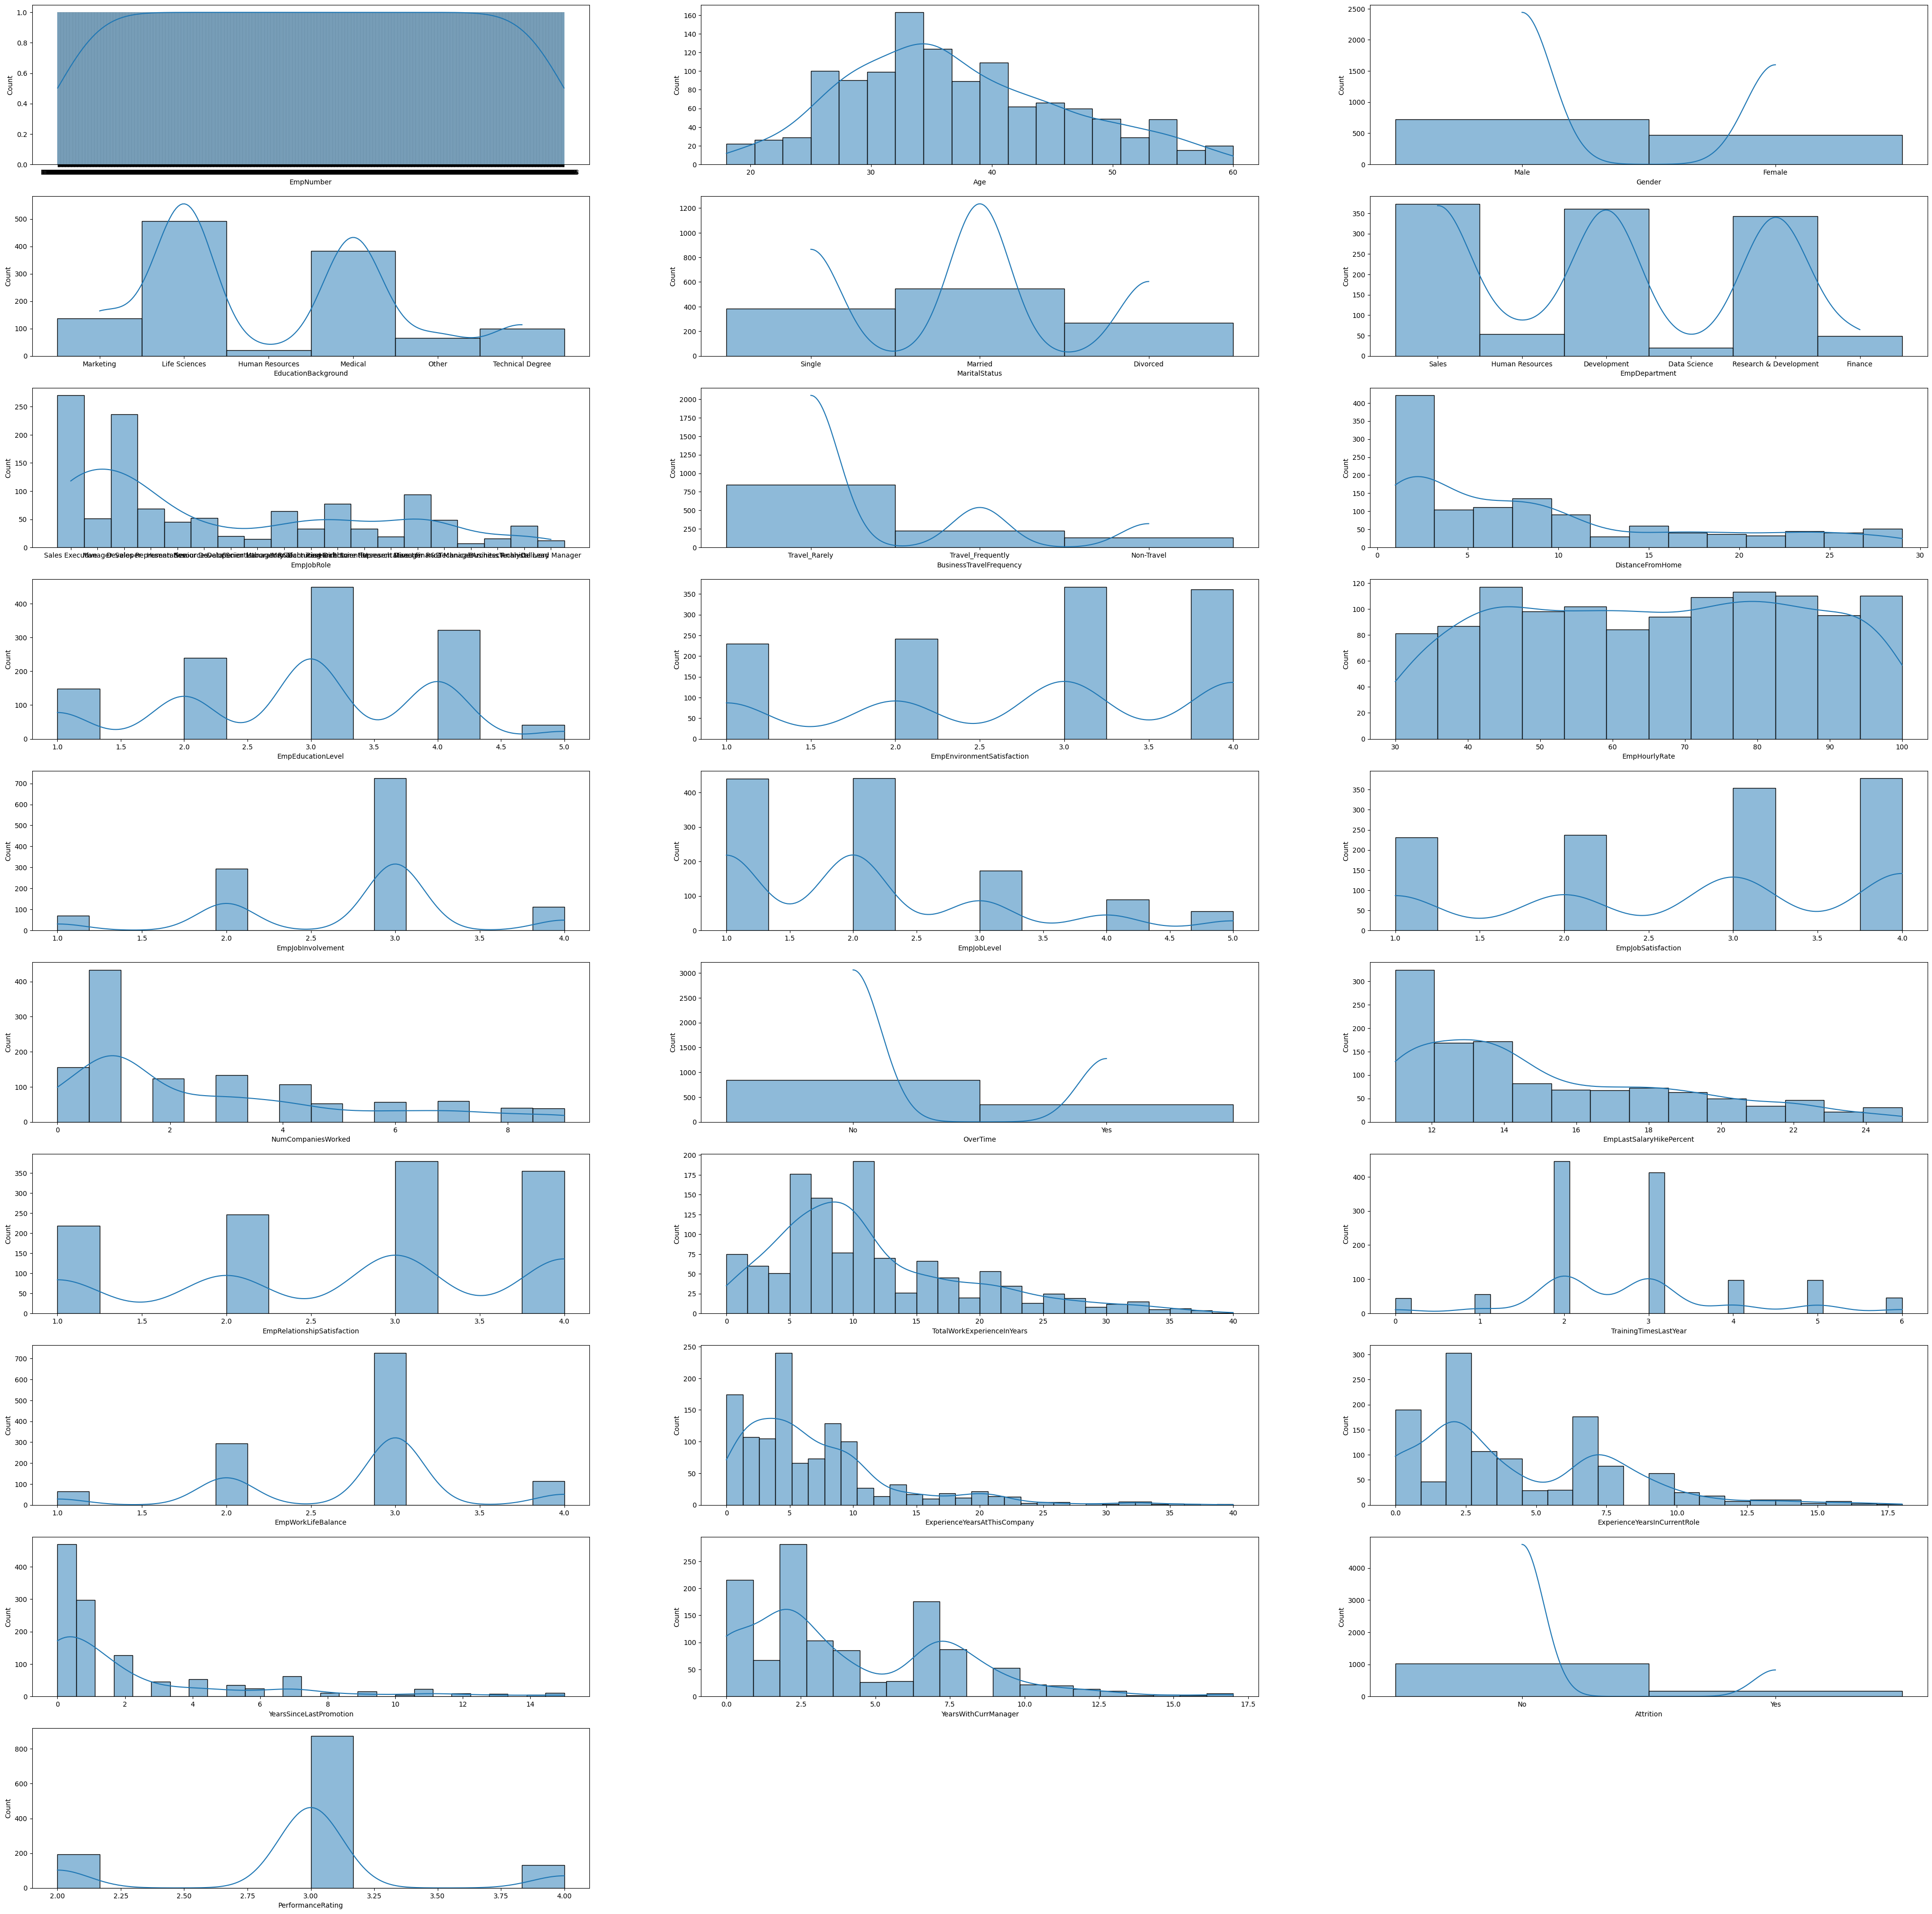

In [9]:
plt.figure(figsize=(50,50),facecolor='white')
pltno = 1 

for col in data:
    if pltno <=30:
        ax = plt.subplot(10,3,pltno)
        sns.histplot(x=col,data=data,kde=True)
    pltno+=1
plt.show()

* The most of the employers are aged between 25 to 40 
* The male employees are more when compared to the female
* The people with Lifescience and meidcal as EducationalBackground are more when compared to the Marketing,Human Resources,Technical Degree and other.
* The most of the employees are married.
* The Sales,Development,Research&Development department have high number of employess when compared to the Human Resouce,Data Science and Fianance.
* The most of the employees Travel_Rarely .
* The Employess with distance less than 5km from home are more and remaining employees as follows.
* The employees with education level with 3 & 4 are more when compared to the others.
* The employees environment satisfaction is very good as if the most of the employees have rated it with  3&4.
* The employess Hourly rate is very consistent according to their work as if it varies from 30 to 100 consistently.
* The employees jobinvolvement is highas we can see .
* The employees joblevel is very low as we can see the most of the level of the employees varie between 1&2.
* As we can see the most of the employees in the office are either fresher or else with 1 year experience in another company.

### 2. Bivariate Analysis

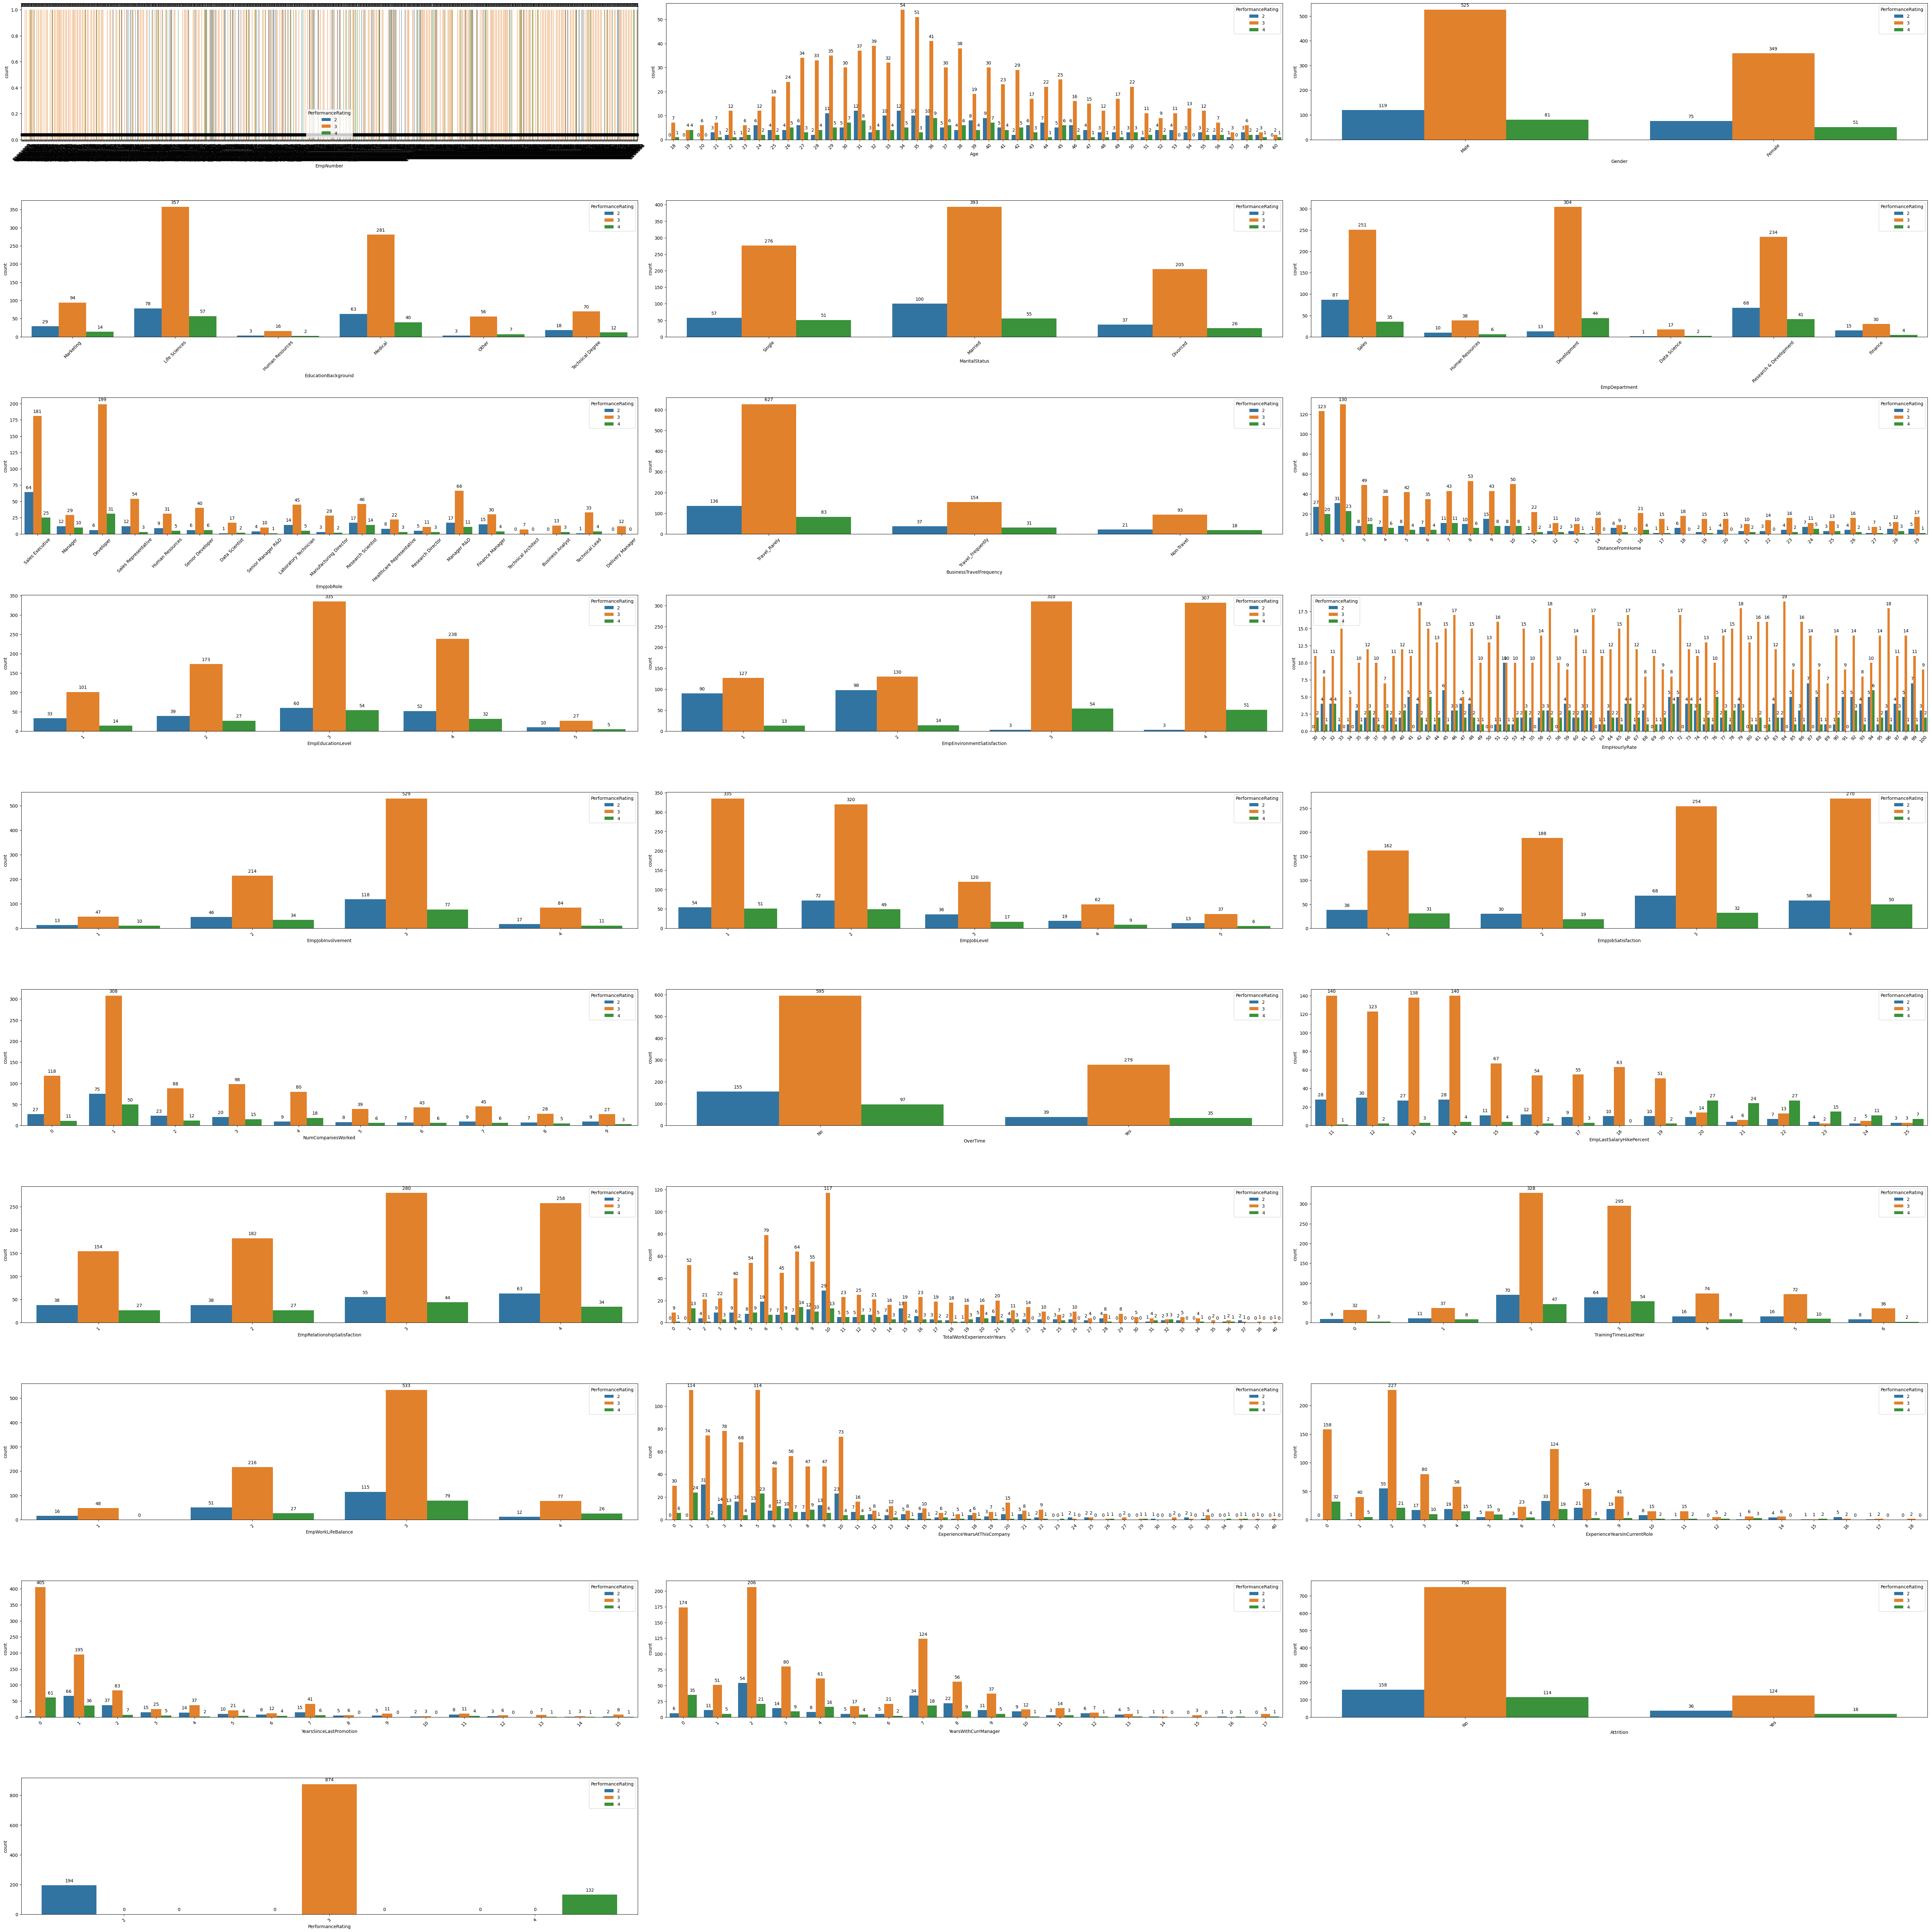

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(60,60), facecolor='white')
pltno = 1

for col in data:
    if pltno <= 30:
        ax = plt.subplot(10, 3, pltno)
        sns.countplot(x=data[col], hue=data['PerformanceRating'])
        plt.xticks(rotation=45)
        
        # Add counts on top of each bar for each hue category
        for p in ax.patches:
            ax.annotate(f'{p.get_height():.0f}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')
        
    pltno += 1

plt.tight_layout()
plt.show()

* We can conclude that from EmpDepartement Development department is showing high performance rate as compared to other departement.
* After development department Research & Development department performed well.Sales,Human resources, data science and finance also performed well.
* employee which are business analyst, technical lead, data scientist, developer,have performed well performance rating of employee does not vary with Marital status employee who do overtime have rated as more as compared to those who doesn't do overtime.
* Employee with gender as male are rated more as compare to female employee, the reason may be there are more number of male employees than female employees in the company.
* Employees with education background of Life science and medical are rated more
* Employee who travel rarely are rated more as compared to those who travel frequently or who are non traveler
* Performance rating of employee depends on Years with current manager.when manager is same for long duration of time the employee * * performace drops. So, for improving performance of employee the manager needs to shuffle atleast after every 2-3 years.
* performance rating depends on years since last promotion. when employee are not promoted since 2 to 3 years, the perfromance of employee drops. Hence to imporve performace of employee the employee should be promoted after every 1 year or at least 2 years.
* Performace of employee also depends on employee work life balance.when employee work life balance is good and are rated as 3 the performance rating of employee is also more.
* when employee relationship satisfaction is more the performance of employee is also more
* When total work experience of employee is above 10 year the performace of employee drops
* when the employee got salary hike of more than 19%, the performce of employee increased. thus, employee performace depends on the salary hike given by the company. employee with higher salary hike percentage has performed well.
* employee who are satisfied by environment have performed well.
* We can see that 11% and 16.3% of employees having low job satisfaction and job involvement have low performance ratings

3. MultiVariate Analysis

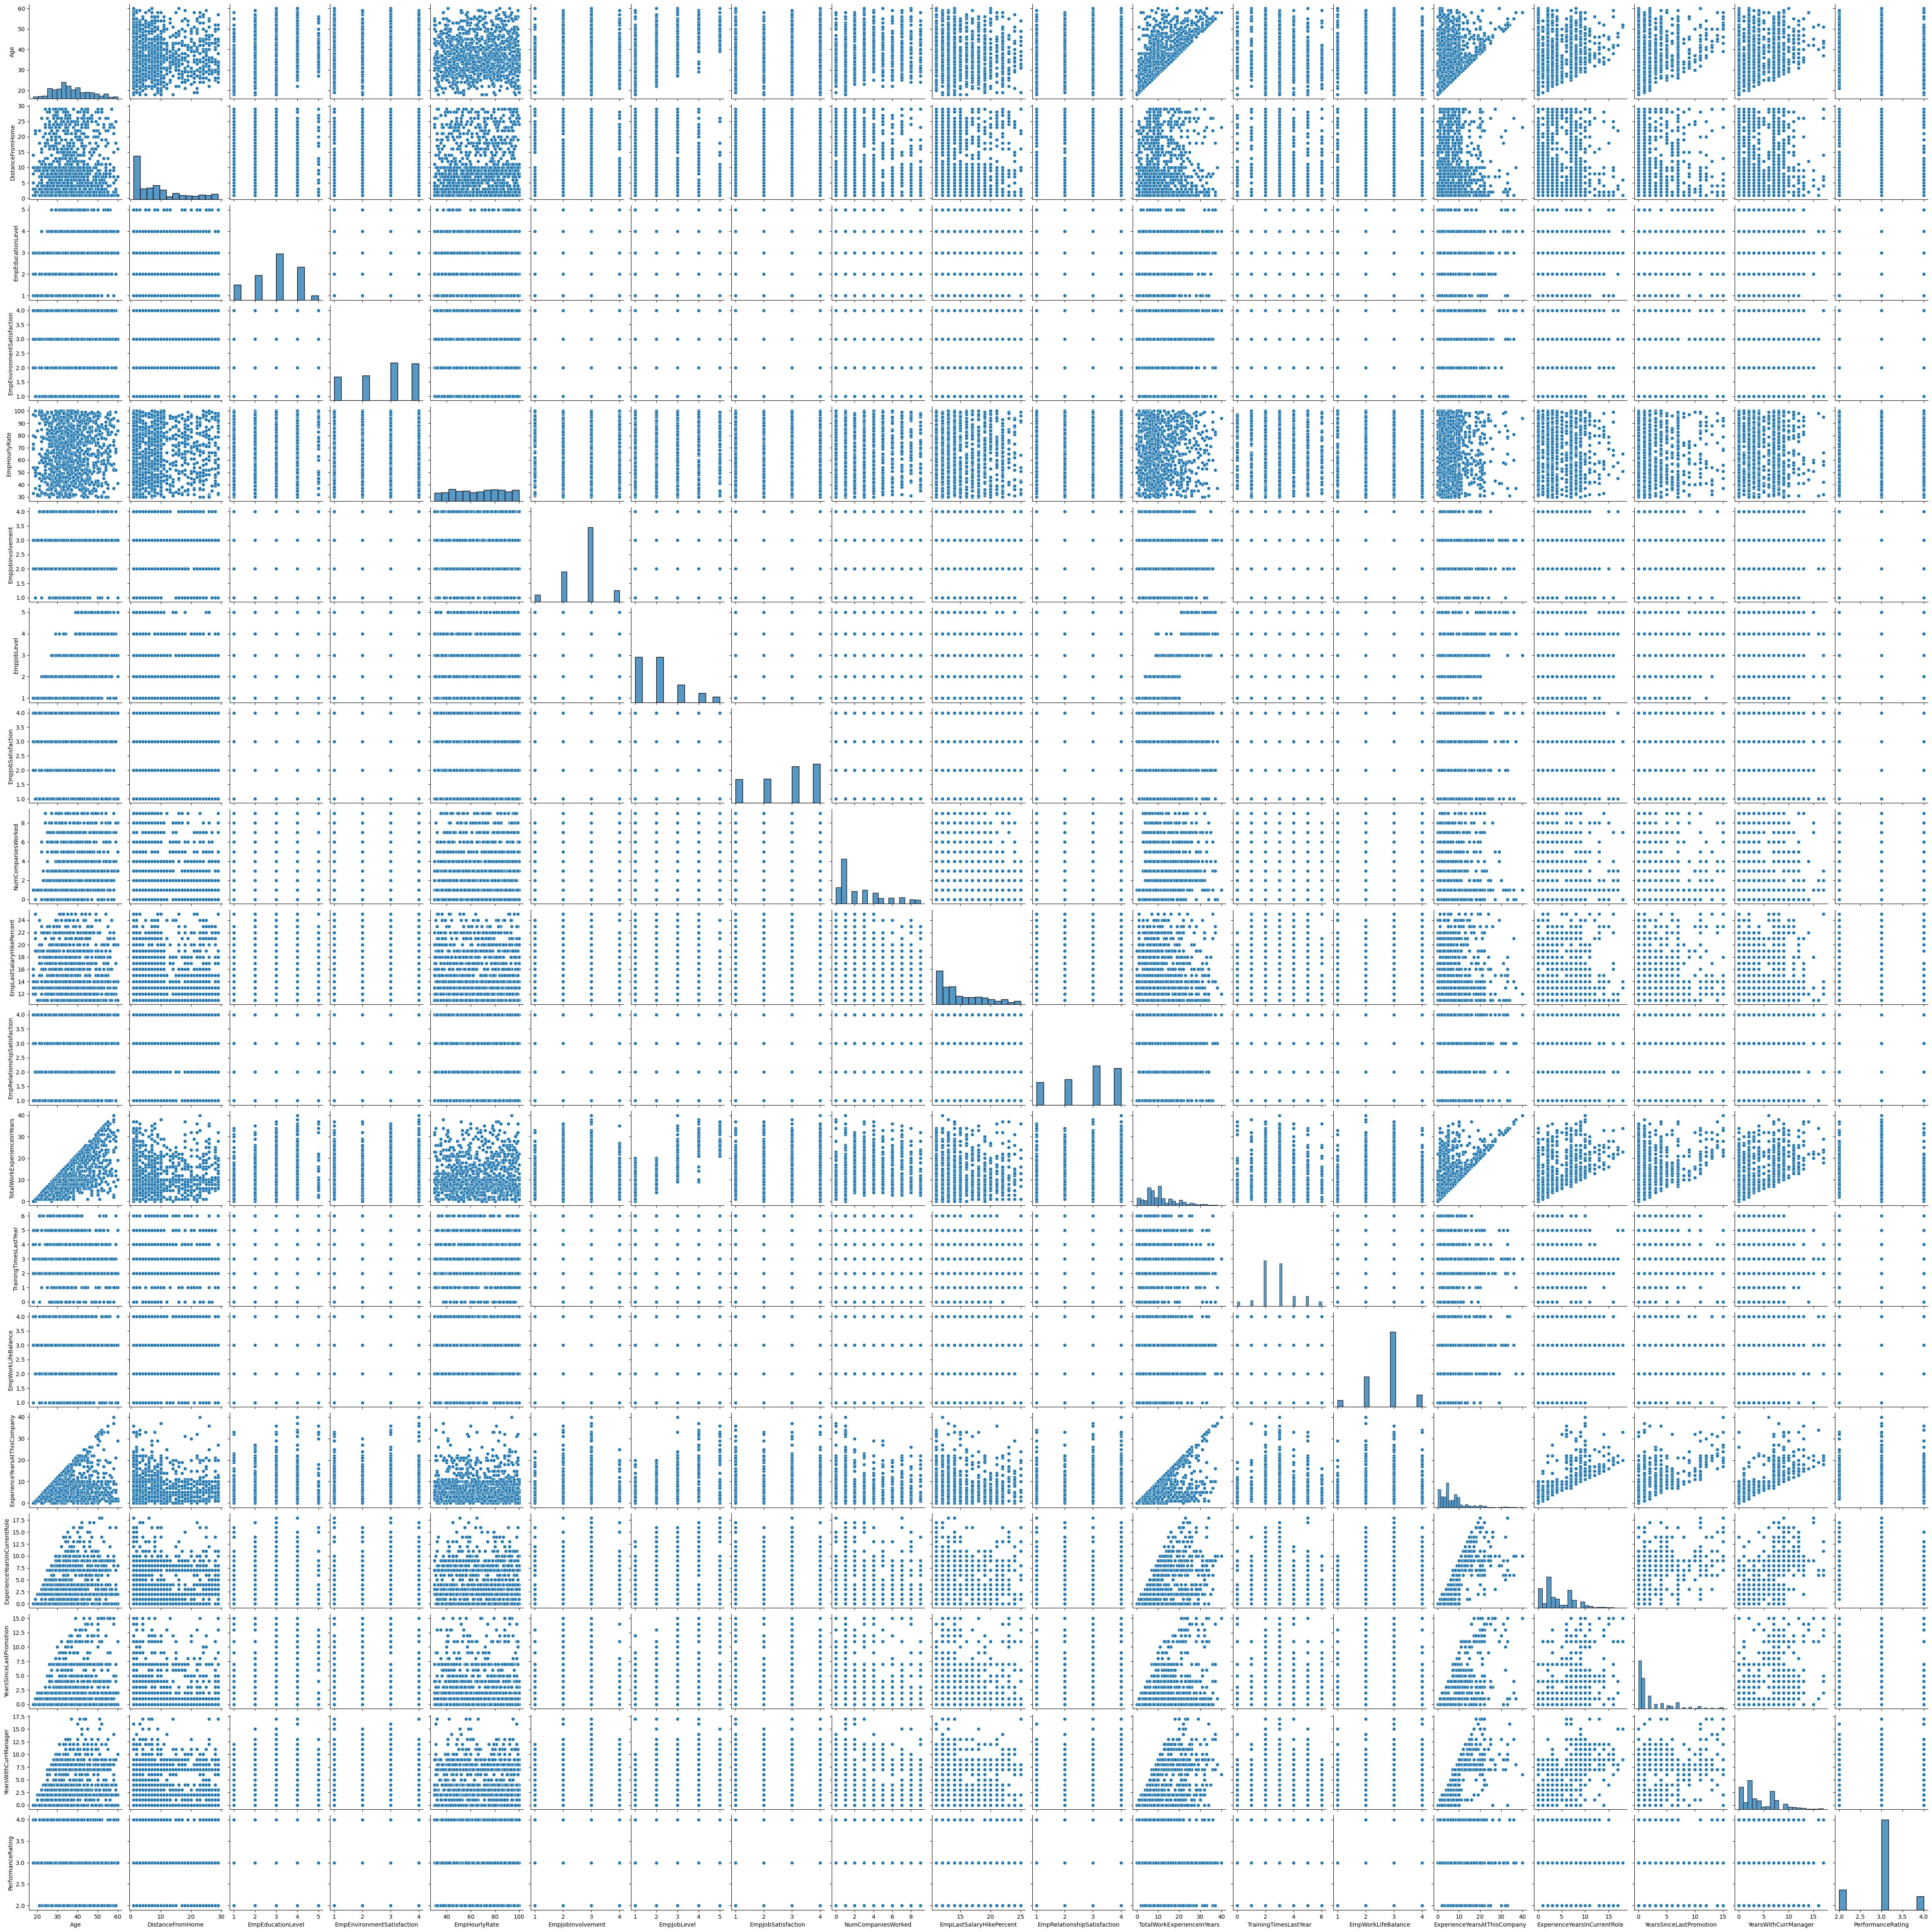

In [11]:
sns.pairplot(data) # Plotting of pair plot to see the realtionship between each and every column.

# Department wise performances

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'Sales'),
  Text(1, 0, 'Human Resources'),
  Text(2, 0, 'Development'),
  Text(3, 0, 'Data Science'),
  Text(4, 0, 'Research & Development'),
  Text(5, 0, 'Finance')])

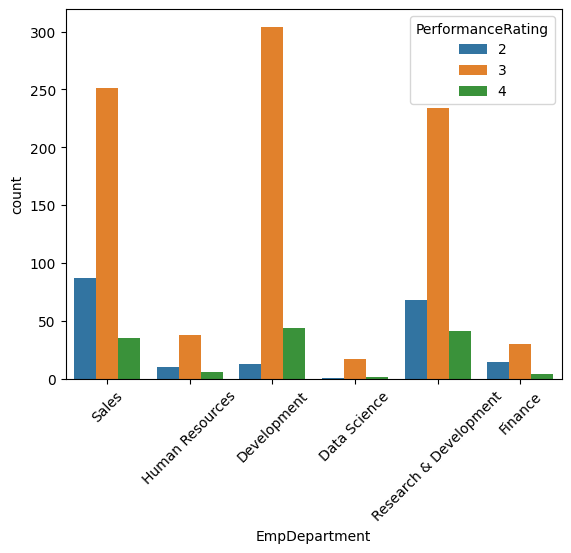

In [12]:
sns.countplot(x=data['EmpDepartment'],hue=data['PerformanceRating']) # Plotting of graph for EmpDepartment and PerformaceRating.
plt.xticks(rotation=45)

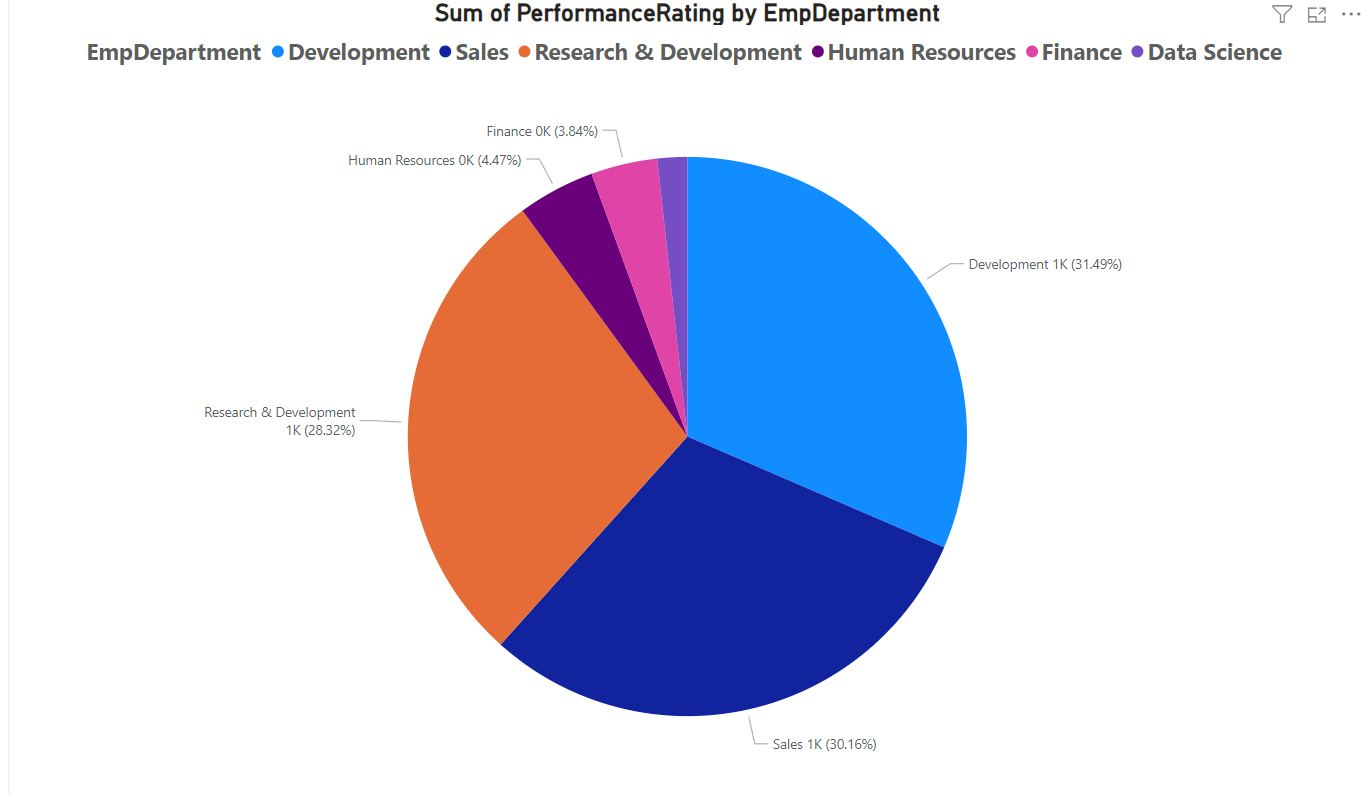

In [13]:
dept=data.loc[:,['EmpDepartment','PerformanceRating']] # Creating of a dataframe of EmpDepartment and PerformanceRating
dept

EmpDepartment  PerformanceRating
0               Sales                  3
1               Sales                  3
2               Sales                  4
3     Human Resources                  3
4               Sales                  3
...               ...                ...
1195            Sales                  4
1196      Development                  3
1197      Development                  3
1198     Data Science                  3
1199            Sales                  2

[1200 rows x 2 columns]

In [14]:
dept.groupby(by='EmpDepartment').sum() # Getting the sum of EmpDepartment upon PerformanceRating

PerformanceRating
EmpDepartment                            
Data Science                           61
Development                          1114
Finance                               136
Human Resources                       158
Research & Development               1002
Sales                                1067

In [15]:
dept.groupby(by='EmpDepartment').value_counts() #Calculating the value_counts od each department acording to performancerating.

EmpDepartment           PerformanceRating
Data Science            3                     17
                        4                      2
                        2                      1
Development             3                    304
                        4                     44
                        2                     13
Finance                 3                     30
                        2                     15
                        4                      4
Human Resources         3                     38
                        2                     10
                        4                      6
Research & Development  3                    234
                        2                     68
                        4                     41
Sales                   3                    251
                        2                     87
                        4                     35
dtype: int64

* As you can see the development team has highest rate of perfomance 
* in the second place the sales team has highest rate of performance
* in the third place research&developmeent has the highest rate of performance after development team and sales team.
* the remaing has no major perforamnce rate .

# Top 3 Important Factors effecting employee performance

In [16]:
# Filtering those employees whose performance rating is low but working in thiscompany for less or equal to 2 years
low_per=data.loc[(data['PerformanceRating']==2) & (data['Attrition']=='No')& (data['EmpJobInvolvement']<= 2)& 
                 (data['ExperienceYearsAtThisCompany'] <= 2),['EmpNumber','ExperienceYearsAtThisCompany',
                                                              'EmpJobInvolvement','Attrition','PerformanceRating']]
low_per

EmpNumber  ExperienceYearsAtThisCompany  EmpJobInvolvement Attrition  \
165   E1001300                             2                  2        No   
182   E1001322                             2                  2        No   
605   E1002079                             2                  2        No   
728   E1002291                             2                  2        No   
878    E100461                             2                  2        No   
1023   E100702                             2                  2        No   

      PerformanceRating  
165                   2  
182                   2  
605                   2  
728                   2  
878                   2  
1023                  2

In [17]:
Factors = ['EmpJobSatisfaction','YearsSinceLastPromotion','EmpJobInvolvement','ExperienceYearsAtThisCompany','PerformanceRating']

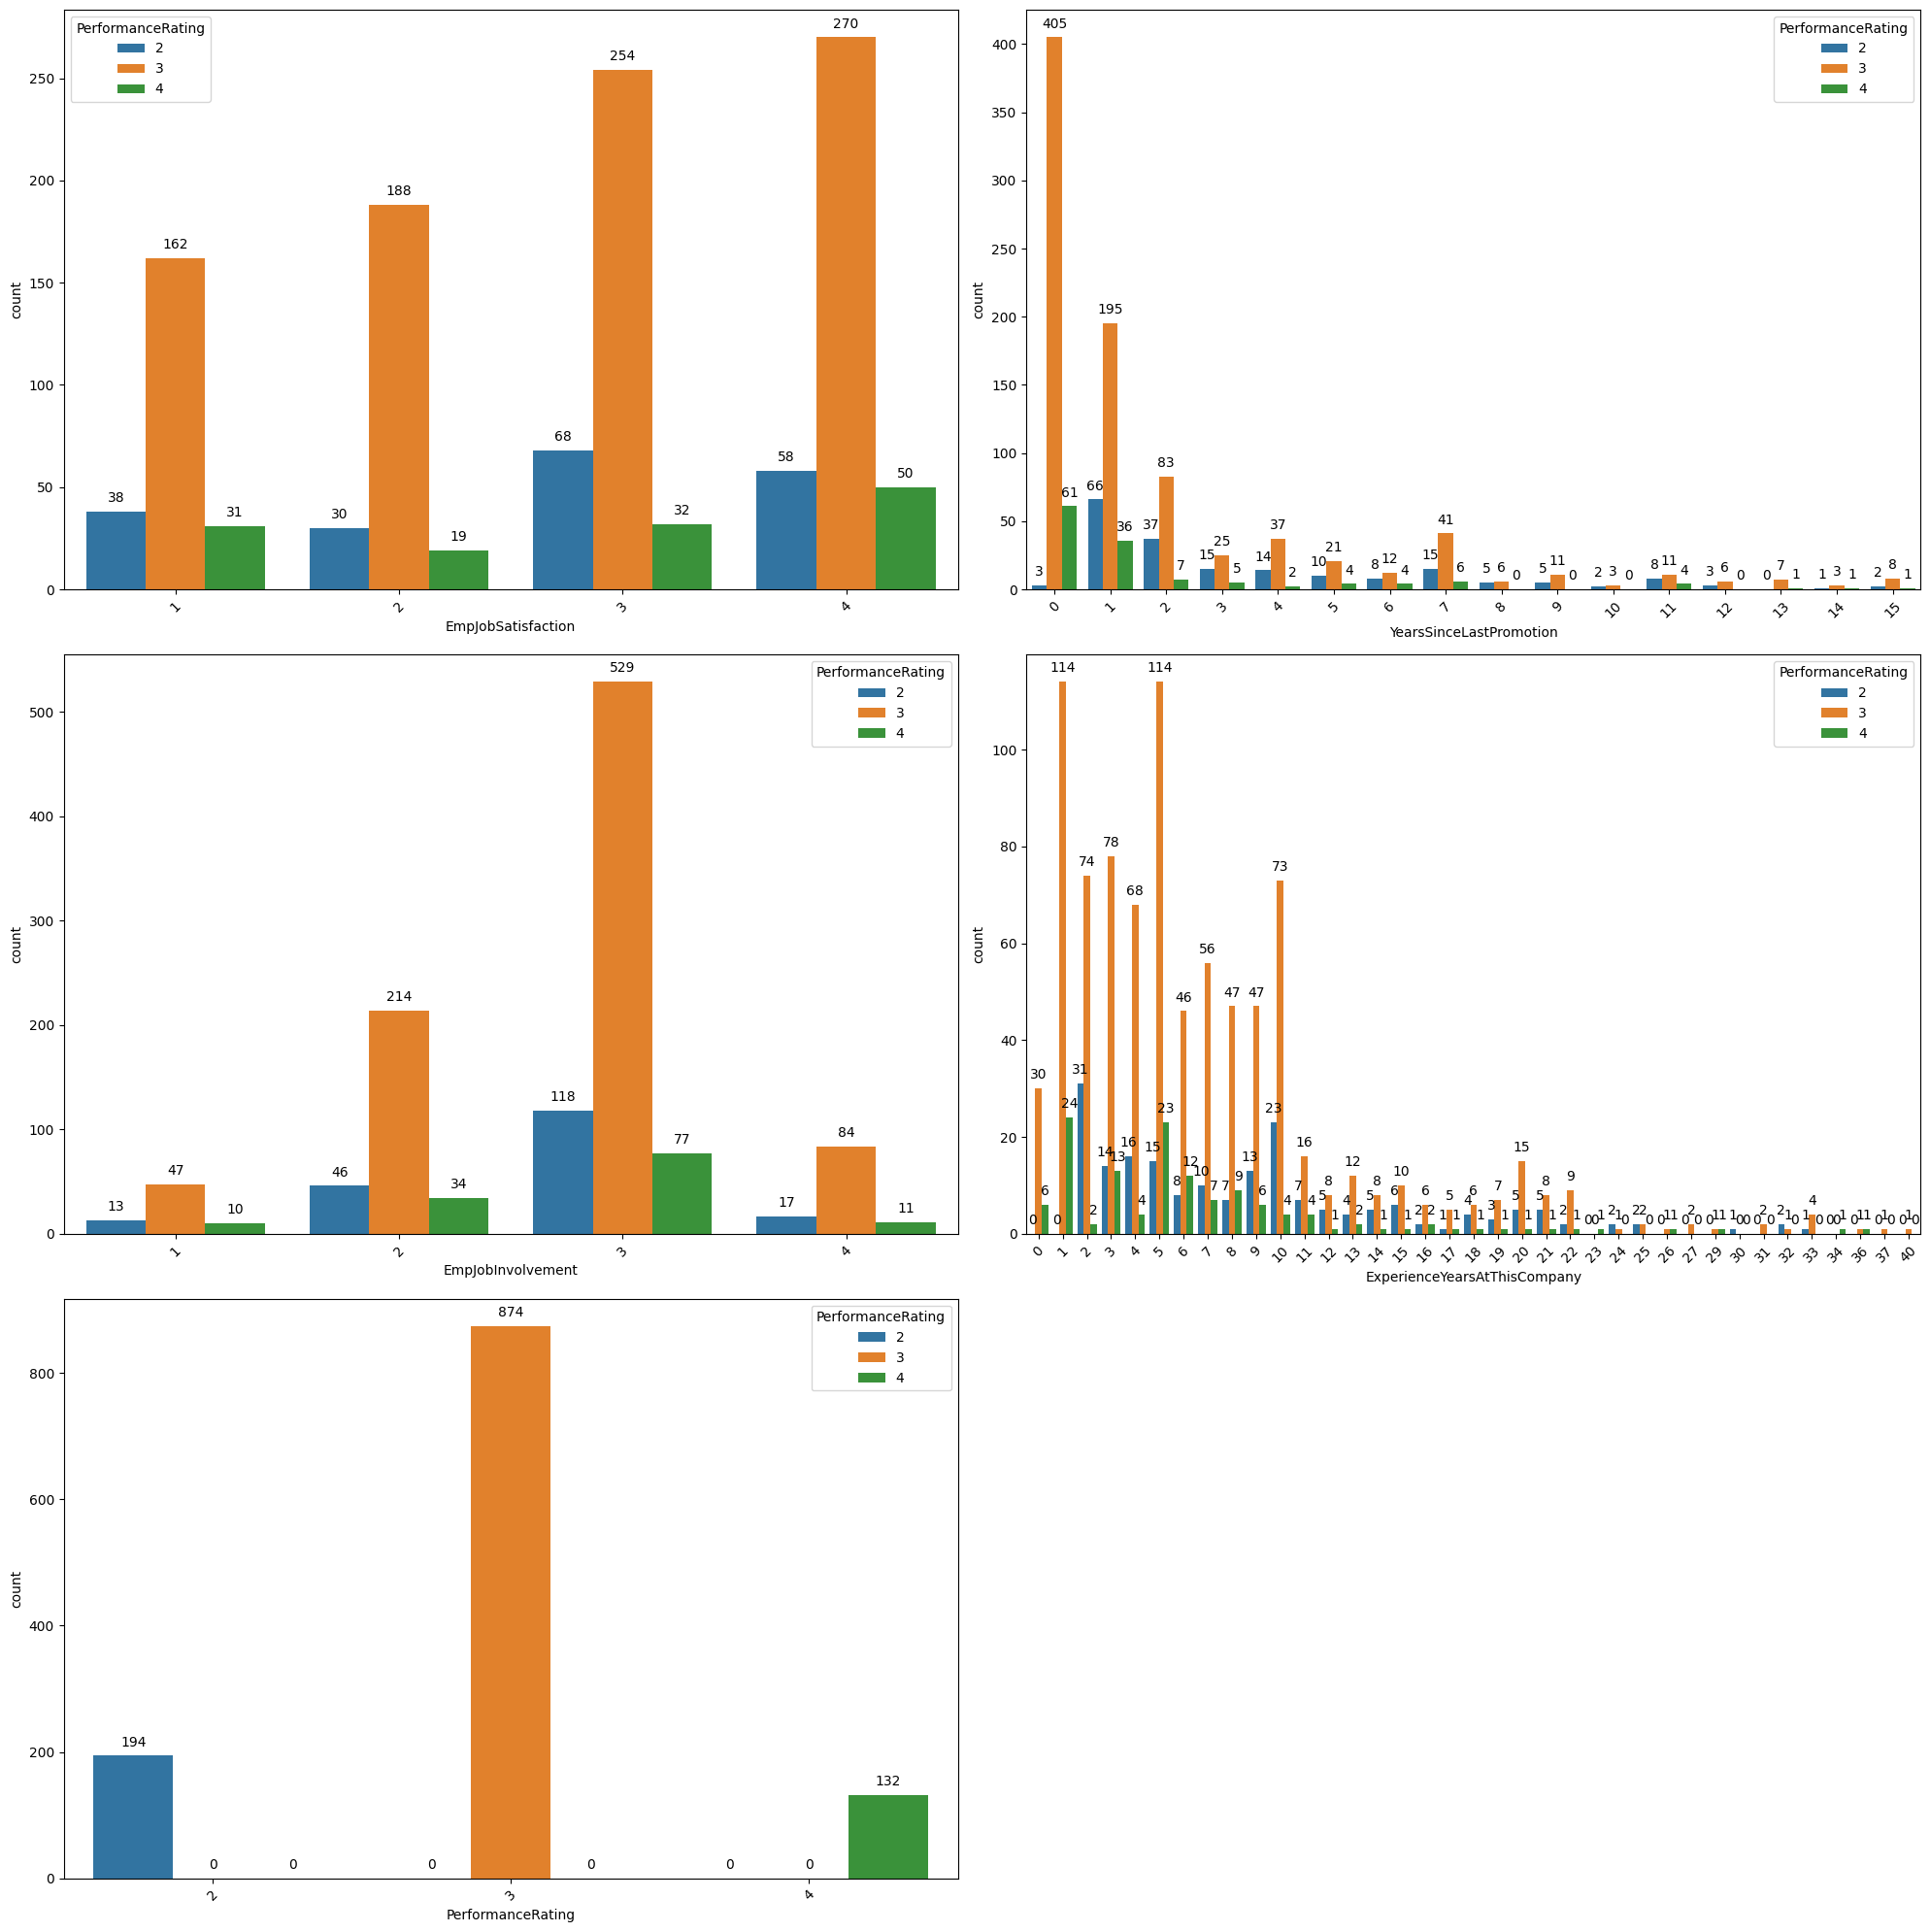

In [18]:
plt.figure(figsize=(20,20), facecolor='white')
pltno = 1

for col in Factors:
    if pltno <= 6:
        ax = plt.subplot(3, 2, pltno)
        sns.countplot(x=data[col], hue=data['PerformanceRating'])
        plt.xticks(rotation=45)
        
        # Add counts on top of each bar for each hue category
        for p in ax.patches:
            ax.annotate(f'{p.get_height():.0f}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')
        
    pltno += 1

plt.tight_layout()
plt.show()

In [19]:
data.head()

EmpNumber  Age Gender EducationBackground MaritalStatus    EmpDepartment  \
0  E1001000   32   Male           Marketing        Single            Sales   
1  E1001006   47   Male           Marketing        Single            Sales   
2  E1001007   40   Male       Life Sciences       Married            Sales   
3  E1001009   41   Male     Human Resources      Divorced  Human Resources   
4  E1001010   60   Male           Marketing        Single            Sales   

        EmpJobRole BusinessTravelFrequency  DistanceFromHome  \
0  Sales Executive           Travel_Rarely                10   
1  Sales Executive           Travel_Rarely                14   
2  Sales Executive       Travel_Frequently                 5   
3          Manager           Travel_Rarely                10   
4  Sales Executive           Travel_Rarely                16   

   EmpEducationLevel  ...  EmpRelationshipSatisfaction  \
0                  3  ...                            4   
1                  4  ...                            4   
2                  4  ...                            3   
3                  4  ...                            2   
4                  4  ...                            4   

   TotalWorkExperienceInYears  TrainingTimesLastYear  EmpWorkLifeBalance  \
0                          10                      2                   2   
1                          20                      2                   3   
2                          20                      2                   3   
3                          23                      2                   2   
4                          10                      1                   3   

   ExperienceYearsAtThisCompany  ExperienceYearsInCurrentRole  \
0                            10                             7   
1                             7                             7   
2                            18                            13   
3                            21                             6   
4                             2                             2   

  YearsSinceLastPromotion  YearsWithCurrManager  Attrition  PerformanceRating  
0                       0                     8         No                  3  
1                       1                     7         No                  3  
2                       1                    12         No                  4  
3                      12                     6         No                  3  
4                       2                     2         No                  3  

[5 rows x 28 columns]

**From above visualization, we can clearly observe that 'EmpJobSatisfaction', 'YearsSinceLastPromotion','EmpJobInvolvement',' Employee experience' marked great impact on Performance ratings. So, from management side, they need to look after in these matters to increase the employees performance**.

# Data Preprocessing

In [20]:
# Finding of Null Values
data.isnull().sum()

EmpNumber                       0
Age                             0
Gender                          0
EducationBackground             0
MaritalStatus                   0
EmpDepartment                   0
EmpJobRole                      0
BusinessTravelFrequency         0
DistanceFromHome                0
EmpEducationLevel               0
EmpEnvironmentSatisfaction      0
EmpHourlyRate                   0
EmpJobInvolvement               0
EmpJobLevel                     0
EmpJobSatisfaction              0
NumCompaniesWorked              0
OverTime                        0
EmpLastSalaryHikePercent        0
EmpRelationshipSatisfaction     0
TotalWorkExperienceInYears      0
TrainingTimesLastYear           0
EmpWorkLifeBalance              0
ExperienceYearsAtThisCompany    0
ExperienceYearsInCurrentRole    0
YearsSinceLastPromotion         0
YearsWithCurrManager            0
Attrition                       0
PerformanceRating               0
dtype: int64

In [21]:
# Finding of Duplicates
data.duplicated().sum()

0

In [22]:
## Encoding Of Categorical columns to Numerical columns Using Map Function
data['Gender'] = data['Gender'].map({'Male':0,'Female':1})

In [23]:
data['EducationBackground'] = data['EducationBackground'].map({'Life Sciences':0,'Medical':1,'Marketing':2,'Technical Degree':3,'Other':4,'Human Resources':5})

In [24]:
data['MaritalStatus'] = data['MaritalStatus'].map({'Married':0,'Single':1,'Divorced':2})

In [25]:
data['EmpDepartment'] = data['EmpDepartment'].map({'Sales':0,'Development':1,'Research & Development':2,'Human Resources':3,'Finance':4,'Data Science':5})

In [26]:
data['EmpJobRole'] = data['EmpJobRole'].map({'Sales Executive':0,'Developer':1,'Manager R&D':2,'Research Scientist':3,'Sales Representative':4,'Laboratory Technician':5,'Senior Developer':6,'Manager':7,'Finance Manager':8,'Human Resources':9,'Technical Lead':10,'Manufacturing Director':11,'Healthcare Representative':12,'Data Scientist':13,'Research Director':14,'Business Analyst':15,'Senior Manager R&D':16,'Delivery Manager':17,'Technical Architect':18})

In [27]:
data['BusinessTravelFrequency'] = data['BusinessTravelFrequency'].map({'Travel_Rarely':0,'Travel_Frequently':1,'Non-Travel':2})

In [28]:
data['OverTime'] = data['OverTime'].map({'Yes':0,'No':1})

In [29]:
data['Attrition'] = data['Attrition'].map({'Yes':0,'No':1})

In [30]:
data

EmpNumber  Age  Gender  EducationBackground  MaritalStatus  \
0     E1001000   32       0                    2              1   
1     E1001006   47       0                    2              1   
2     E1001007   40       0                    0              0   
3     E1001009   41       0                    5              2   
4     E1001010   60       0                    2              1   
...        ...  ...     ...                  ...            ...   
1195   E100992   27       1                    1              2   
1196   E100993   37       0                    0              1   
1197   E100994   50       0                    1              0   
1198   E100995   34       1                    1              1   
1199   E100998   24       1                    0              1   

      EmpDepartment  EmpJobRole  BusinessTravelFrequency  DistanceFromHome  \
0                 0           0                        0                10   
1                 0           0                        0                14   
2                 0           0                        1                 5   
3                 3           7                        0                10   
4                 0           0                        0                16   
...             ...         ...                      ...               ...   
1195              0           0                        1                 3   
1196              1           6                        0                10   
1197              1           6                        0                28   
1198              5          13                        0                 9   
1199              0           0                        0                 3   

      EmpEducationLevel  ...  EmpRelationshipSatisfaction  \
0                     3  ...                            4   
1                     4  ...                            4   
2                     4  ...                            3   
3                     4  ...                            2   
4                     4  ...                            4   
...                 ...  ...                          ...   
1195                  1  ...                            2   
1196                  2  ...                            1   
1197                  1  ...                            3   
1198                  3  ...                            2   
1199                  2  ...                            1   

      TotalWorkExperienceInYears  TrainingTimesLastYear  EmpWorkLifeBalance  \
0                             10                      2                   2   
1                             20                      2                   3   
2                             20                      2                   3   
3                             23                      2                   2   
4                             10                      1                   3   
...                          ...                    ...                 ...   
1195                           6                      3                   3   
1196                           4                      2                   3   
1197                          20                      3                   3   
1198                           9                      3                   4   
1199                           4                      3                   3   

      ExperienceYearsAtThisCompany  ExperienceYearsInCurrentRole  \
0                               10                             7   
1                                7                             7   
2                               18                            13   
3                               21                             6   
4                                2                             2   
...                            ...                           ...   
1195                             6                             5   
1196                             1   

In [31]:
# Dropping of column EmpNumber as it is not necessary
data.drop(['EmpNumber'],inplace=True,axis=1)

In [32]:
# Scaling of Data
scale = MinMaxScaler()
df = scale.fit_transform(data)

In [33]:
df1 = pd.DataFrame(df,columns=['Age', 'Gender', 'EducationBackground', 'MaritalStatus',
       'EmpDepartment', 'EmpJobRole', 'BusinessTravelFrequency',
       'DistanceFromHome', 'EmpEducationLevel', 'EmpEnvironmentSatisfaction',
       'EmpHourlyRate', 'EmpJobInvolvement', 'EmpJobLevel',
       'EmpJobSatisfaction', 'NumCompaniesWorked', 'OverTime',
       'EmpLastSalaryHikePercent', 'EmpRelationshipSatisfaction',
       'TotalWorkExperienceInYears', 'TrainingTimesLastYear',
       'EmpWorkLifeBalance', 'ExperienceYearsAtThisCompany',
       'ExperienceYearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager', 'Attrition', 'PerformanceRating'])

In [34]:
df1

Age  Gender  EducationBackground  MaritalStatus  EmpDepartment  \
0     0.333333     0.0                  0.4            0.5            0.0   
1     0.690476     0.0                  0.4            0.5            0.0   
2     0.523810     0.0                  0.0            0.0            0.0   
3     0.547619     0.0                  1.0            1.0            0.6   
4     1.000000     0.0                  0.4            0.5            0.0   
...        ...     ...                  ...            ...            ...   
1195  0.214286     1.0                  0.2            1.0            0.0   
1196  0.452381     0.0                  0.0            0.5            0.2   
1197  0.761905     0.0                  0.2            0.0            0.2   
1198  0.380952     1.0                  0.2            0.5            1.0   
1199  0.142857     1.0                  0.0            0.5            0.0   

      EmpJobRole  BusinessTravelFrequency  DistanceFromHome  \
0       0.000000                      0.0          0.321429   
1       0.000000                      0.0          0.464286   
2       0.000000                      0.5          0.142857   
3       0.388889                      0.0          0.321429   
4       0.000000                      0.0          0.535714   
...          ...                      ...               ...   
1195    0.000000                      0.5          0.071429   
1196    0.333333                      0.0          0.321429   
1197    0.333333                      0.0          0.964286   
1198    0.722222                      0.0          0.285714   
1199    0.000000                      0.0          0.071429   

      EmpEducationLevel  EmpEnvironmentSatisfaction  ...  \
0                  0.50                    1.000000  ...   
1                  0.75                    1.000000  ...   
2                  0.75                    1.000000  ...   
3                  0.75                    0.333333  ...   
4                  0.75                    0.000000  ...   
...                 ...                         ...  ...   
1195               0.00                    1.000000  ...   
1196               0.25                    1.000000  ...   
1197               0.00                    1.000000  ...   
1198               0.50                    1.000000  ...   
1199               0.25                    0.000000  ...   

      EmpRelationshipSatisfaction  TotalWorkExperienceInYears  \
0                        1.000000                       0.250   
1                        1.000000                       0.500   
2                        0.666667                       0.500   
3                        0.333333                       0.575   
4                        1.000000                       0.250   
...                           ...                         ...   
1195                     0.333333                       0.150   
1196                     0.000000                       0.100   
1197                     0.666667                       0.500   
1198                     0.333333                       0.225   
1199                     0.000000                       0.100   

      TrainingTimesLastYear  EmpWorkLifeBalance  ExperienceYearsAtThisCompany  \
0                  0.333333            0.333333                         0.250   
1                  0.333333            0.666667                         0.175   
2                  0.333333            0.666667                         0.450   
3                  0.333333            0.333333                         0.525   
4                  0.166667            0.666667                         0.050   
...                     ...                 ...                           ...   
1195               0.500000            0.666667                         0.150   
1196               0.333333            0.666667                         0.025   
1197               0.500000            0.666667                         0.500   
1198             

# Feature Selection

<Axes: >

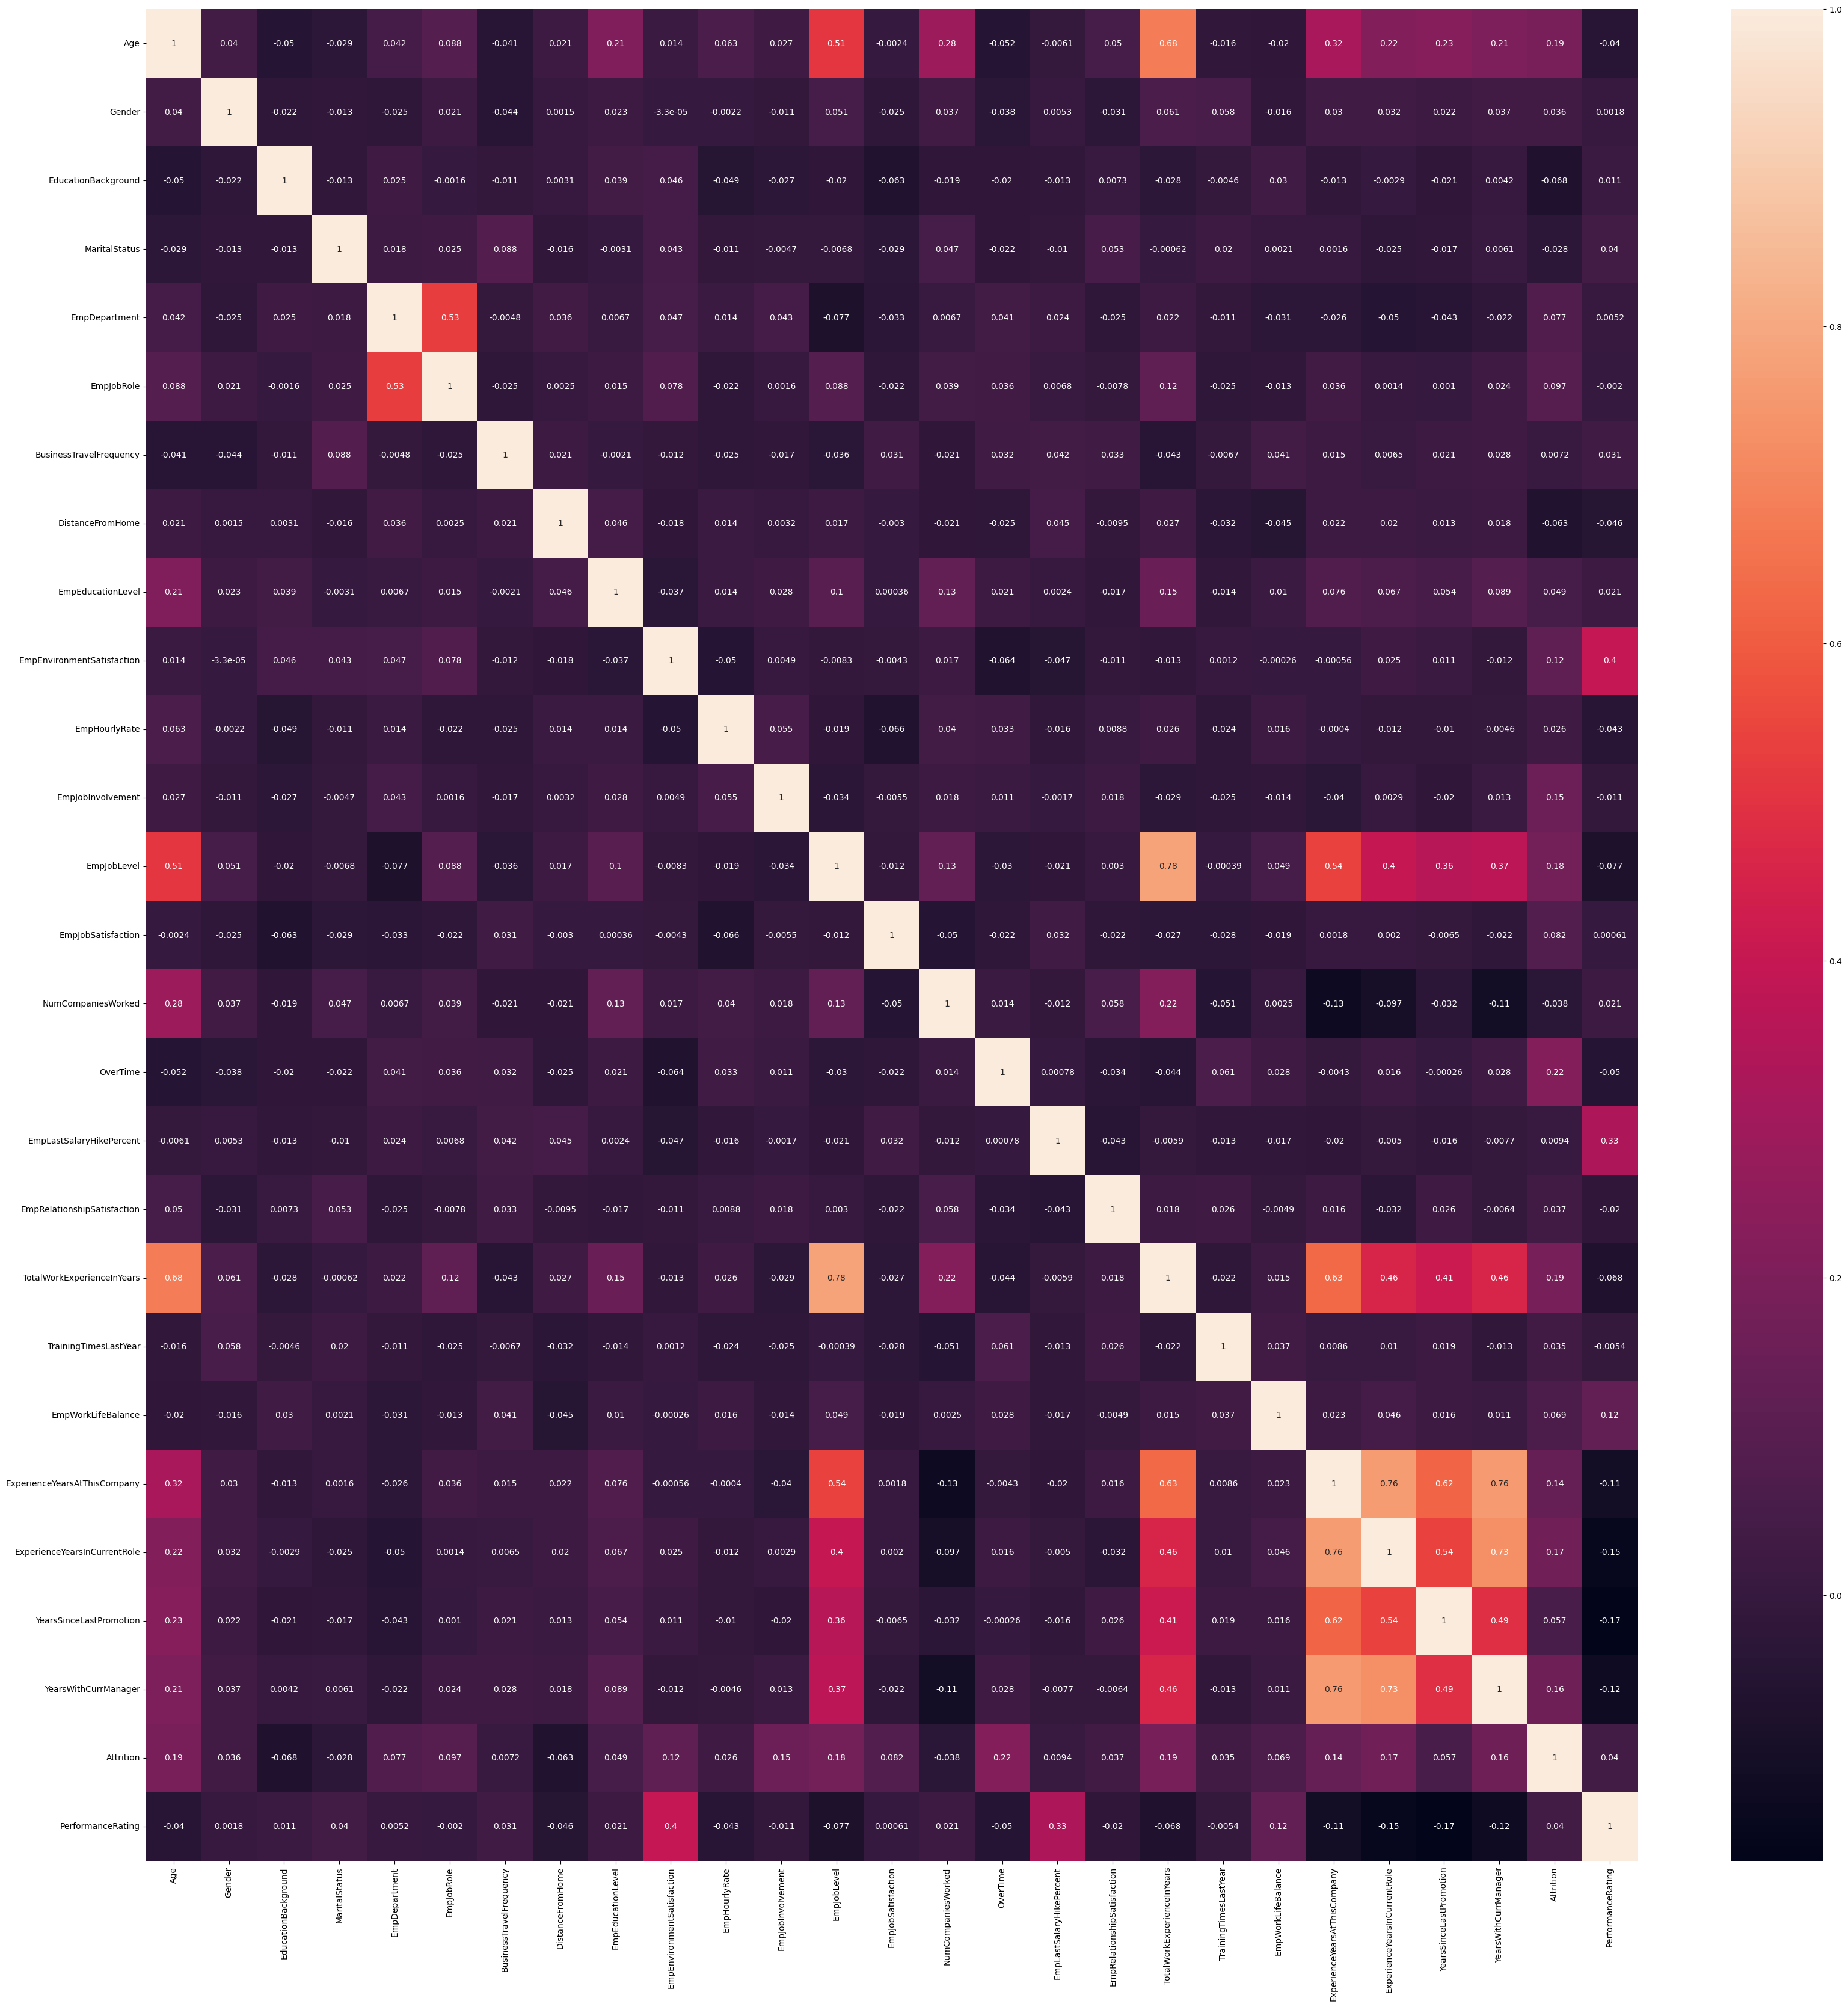

In [35]:
plt.figure(figsize=(40,40),facecolor='white')
sns.heatmap(df1.corr(),annot=True)

**As you can see from the above heatmap there are no columns in the dataset with high correlation.so we are not going to drop any of the columns.**

# Model Creation

In [36]:
x = df1.drop('PerformanceRating',axis=1)
y = data['PerformanceRating']

In [37]:
data.PerformanceRating.value_counts()

3    874
2    194
4    132
Name: PerformanceRating, dtype: int64

In [38]:
# Assuming x_train, y_train, x_test, and y_test are already defined
# You can replace them with your actual training and testing data
x_train, x_test, y_train, y_test = train_test_split(x,y,random_state=42)
def run_multipe_algorithms(x_train, y_train, x_test, y_test, models):
    results = {}

    for model_name, model in models.items():
        # Train the model
        model.fit(x_train, y_train)

        # Make predictions
        y_pred = model.predict(x_test)

        # Calculate accuracy and f1-score
        accuracy = accuracy_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred,average='macro')
        recall = recall_score(y_test,y_pred,average='macro')
        precision = precision_score(y_test,y_pred,average='macro')
        cr = classification_report(y_test,y_pred)

        # Store results in the dictionary
        results[model_name] = {
            'accuracy': accuracy,
            'f1-score': f1,
            'recall score': recall,
            'precision score': precision,
            'Report' : cr
        }

    return results

model_to_run = {
    'LogisticRegression': LogisticRegression(),
    'SVM': SVC(),
    'neighbors':KNeighborsClassifier(),
    'decisiontree':DecisionTreeClassifier(),
    'RandomForest': RandomForestClassifier(),
}

results = run_multipe_algorithms(x_train, y_train, x_test, y_test, model_to_run)

# Print the results
for model, scores in results.items():
    print(f"Model: {model}")
    print(f"Accuracy: {scores['accuracy']}")
    print(f"F1 Score: {scores['f1-score']}")
    print(f"Recall score : {scores['recall score']}")
    print(f"Precision Score : {scores['precision score']}")
    print('--'*30)
    print(f"Report: {scores['Report']}")
    print('==' * 30)
    print('=='*30)

Model: LogisticRegression
Accuracy: 0.8166666666666667
F1 Score: 0.6845629194858835
Recall score : 0.668801170469691
Precision Score : 0.7029567382508559
------------------------------------------------------------
Report:               precision    recall  f1-score   support

           2       0.46      0.43      0.44        37
           3       0.87      0.90      0.89       232
           4       0.78      0.68      0.72        31

    accuracy                           0.82       300
   macro avg       0.70      0.67      0.68       300
weighted avg       0.81      0.82      0.81       300

Model: SVM
Accuracy: 0.8133333333333334
F1 Score: 0.6120918828235902
Recall score : 0.5608045475954264
Precision Score : 0.7331501831501832
------------------------------------------------------------
Report:               precision    recall  f1-score   support

           2       0.50      0.35      0.41        37
           3       0.84      0.94      0.89       232
           4       0.86 

In [39]:
pd.DataFrame(results).T # The Report of all Models. 

accuracy  f1-score recall score precision score  \
LogisticRegression  0.816667  0.684563     0.668801        0.702957   
SVM                 0.813333  0.612092     0.560805         0.73315   
neighbors           0.763333  0.507976     0.489186        0.619358   
decisiontree            0.87   0.78535     0.801288         0.77154   
RandomForest        0.923333   0.87042      0.86971        0.881703   

                                                               Report  
LogisticRegression                precision    recall  f1-score   ...  
SVM                               precision    recall  f1-score   ...  
neighbors                         precision    recall  f1-score   ...  
decisiontree                      precision    recall  f1-score   ...  
RandomForest                      precision    recall  f1-score   ...

# Applying Smote 

In [40]:
from imblearn.over_sampling import SMOTE
oversample = SMOTE(random_state=42)

x_sampled,y_sampled = oversample.fit_resample(x_train,y_train)

In [41]:
def run_multipe_algorithms(x_sampled, y_sampled, x_test, y_test, models):
    results = {}

    for model_name, model in models.items():
        # Train the model
        model.fit(x_sampled, y_sampled)

        # Make predictions
        y_pred = model.predict(x_test)

        # Calculate accuracy and f1-score
        accuracy = accuracy_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred,average='macro')
        recall = recall_score(y_test,y_pred,average='macro')
        precision = precision_score(y_test,y_pred,average='macro')
        cr = classification_report(y_test,y_pred)

        # Store results in the dictionary
        results[model_name] = {
            'accuracy': accuracy,
            'f1-score': f1,
            'recall score': recall,
            'precision score': precision,
            'Report' : cr
        }

    return results

model_to_run = {
    'LogisticRegression': LogisticRegression(),
    'SVM': SVC(),
    'neighbors':KNeighborsClassifier(),
    'decisiontree':DecisionTreeClassifier(),
    'RandomForest': RandomForestClassifier(),
}

results = run_multipe_algorithms(x_sampled, y_sampled, x_test, y_test, model_to_run)

# Print the results
for model, scores in results.items():
    print(f"Model: {model}")
    print(f"Accuracy: {scores['accuracy']}")
    print(f"F1 Score: {scores['f1-score']}")
    print(f"Recall score : {scores['recall score']}")
    print(f"Precision Score : {scores['precision score']}")
    print('--'*30)
    print(f"Report: {scores['Report']}")
    print('==' * 30)
    print('=='*30)

Model: LogisticRegression
Accuracy: 0.6933333333333334
F1 Score: 0.6104982171138746
Recall score : 0.7420269268155808
Precision Score : 0.5763689968585777
------------------------------------------------------------
Report:               precision    recall  f1-score   support

           2       0.38      0.78      0.51        37
           3       0.93      0.67      0.78       232
           4       0.41      0.77      0.54        31

    accuracy                           0.69       300
   macro avg       0.58      0.74      0.61       300
weighted avg       0.81      0.69      0.72       300

Model: SVM
Accuracy: 0.76
F1 Score: 0.6603824067241988
Recall score : 0.7369862910741665
Precision Score : 0.6234432234432234
------------------------------------------------------------
Report:               precision    recall  f1-score   support

           2       0.43      0.73      0.54        37
           3       0.92      0.77      0.84       232
           4       0.52      0.71    

In [42]:
pd.DataFrame(results).T # The Report of all models after using SMOTE.

accuracy  f1-score recall score precision score  \
LogisticRegression  0.693333  0.610498     0.742027        0.576369   
SVM                     0.76  0.660382     0.736986        0.623443   
neighbors           0.513333  0.448341     0.598632        0.469341   
decisiontree        0.866667  0.774399     0.799851        0.753012   
RandomForest        0.893333  0.833977     0.866095        0.816266   

                                                               Report  
LogisticRegression                precision    recall  f1-score   ...  
SVM                               precision    recall  f1-score   ...  
neighbors                         precision    recall  f1-score   ...  
decisiontree                      precision    recall  f1-score   ...  
RandomForest                      precision    recall  f1-score   ...

# Applying HyperParameters 

In [43]:
def run_multiple_algorithms(x_train, y_train, x_test, y_test, models):
    results = {}

    for model_name, (model_class, hyperparams) in models.items():
        # Initialize the model with hyperparameters
        model = model_class(**hyperparams)

        # Train the model
        model.fit(x_train, y_train)

        # Make predictions
        y_pred = model.predict(x_test)

        # Calculate accuracy and f1-score
        accuracy = accuracy_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred,average='macro')
        recall = recall_score(y_test,y_pred,average='macro')
        precision = precision_score(y_test,y_pred,average='macro')
        cr = classification_report(y_test,y_pred)


        # Store results in the dictionary
        results[model_name] = {
            'accuracy': accuracy,
            'f1-score': f1,
            'recall score': recall,
            'precision score': precision,
            'Report' : cr
        }

    return results

# Define models along with their hyperparameters
model_to_run = {
    'LogisticRegression': (LogisticRegression, {'C': 0.1, 'solver': 'liblinear'}),
    'SVM': (SVC, {'kernel': 'linear', 'C': 1.0}),
    'KNeighbors': (KNeighborsClassifier, {'n_neighbors': 5}),
    'DecisionTree': (DecisionTreeClassifier, {'max_depth': 5}),
    'RandomForest': (RandomForestClassifier, {'max_depth': 20, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 100}
                    )
}

# Obtain results
results = run_multiple_algorithms(x_train, y_train, x_test, y_test, model_to_run)

# Print the results
for model, scores in results.items():
    print(f"Model: {model}")
    print(f"Accuracy: {scores['accuracy']}")
    print(f"F1 Score: {scores['f1-score']}")
    print(f"Recall score : {scores['recall score']}")
    print(f"Precision Score : {scores['precision score']}")
    print('--'*30)
    print(f"Report: {scores['Report']}")
    print('==' * 30)
    print('==' * 30)

Model: LogisticRegression
Accuracy: 0.79
F1 Score: 0.46492513334618607
Recall score : 0.4366150076661756
Precision Score : 0.7169039145907473
------------------------------------------------------------
Report:               precision    recall  f1-score   support

           2       0.60      0.24      0.35        37
           3       0.80      0.97      0.88       232
           4       0.75      0.10      0.17        31

    accuracy                           0.79       300
   macro avg       0.72      0.44      0.46       300
weighted avg       0.77      0.79      0.74       300

Model: SVM
Accuracy: 0.81
F1 Score: 0.6796360233512625
Recall score : 0.6717561554880799
Precision Score : 0.6901896889736662
------------------------------------------------------------
Report:               precision    recall  f1-score   support

           2       0.45      0.49      0.47        37
           3       0.88      0.88      0.88       232
           4       0.74      0.65      0.69       

In [44]:
pd.DataFrame(results).T # The Report of all models after Applying Hyperparams.

accuracy  f1-score recall score precision score  \
LogisticRegression      0.79  0.464925     0.436615        0.716904   
SVM                     0.81  0.679636     0.671756         0.69019   
KNeighbors          0.763333  0.507976     0.489186        0.619358   
DecisionTree        0.853333  0.774815     0.807505         0.75824   
RandomForest        0.916667  0.859264     0.851692         0.87537   

                                                               Report  
LogisticRegression                precision    recall  f1-score   ...  
SVM                               precision    recall  f1-score   ...  
KNeighbors                        precision    recall  f1-score   ...  
DecisionTree                      precision    recall  f1-score   ...  
RandomForest                      precision    recall  f1-score   ...

# Artificial Neural Network

In [45]:
from sklearn.neural_network import MLPClassifier
model = MLPClassifier(hidden_layer_sizes=(60,3),
                      learning_rate='constant',
                      max_iter=250,
                      random_state=42)

In [46]:
model.fit(x_train,y_train)

MLPClassifier(hidden_layer_sizes=(60, 3), max_iter=250, random_state=42)

In [47]:
mlp_prdict_probability = model.predict_proba(x_test)
mlp_prdict_probability

array([[6.27253529e-01, 2.30339855e-01, 1.42406616e-01],
       [6.27253529e-01, 2.30339855e-01, 1.42406616e-01],
       [2.48654682e-04, 9.72074174e-01, 2.76771708e-02],
       [4.96753334e-04, 9.64852108e-01, 3.46511390e-02],
       [1.17079752e-03, 9.53144952e-01, 4.56842504e-02],
       [2.54729829e-04, 9.71849756e-01, 2.78955144e-02],
       [6.27253529e-01, 2.30339855e-01, 1.42406616e-01],
       [1.62147351e-04, 9.75761796e-01, 2.40760564e-02],
       [6.03808992e-01, 2.48328913e-01, 1.47862095e-01],
       [6.27253529e-01, 2.30339855e-01, 1.42406616e-01],
       [2.86324105e-02, 8.49161384e-01, 1.22206205e-01],
       [6.27253529e-01, 2.30339855e-01, 1.42406616e-01],
       [2.00994915e-02, 8.69504460e-01, 1.10396048e-01],
       [6.27253529e-01, 2.30339855e-01, 1.42406616e-01],
       [1.96532997e-01, 6.16459515e-01, 1.87007488e-01],
       [7.33434978e-03, 9.11157100e-01, 8.15085501e-02],
       [4.52729475e-04, 9.65922314e-01, 3.36249561e-02],
       [2.39420623e-01, 5.69479

In [48]:
# Prediction on test data
mlp_test_predict = model.predict(x_test)

# Prediction on training data
mlp_train_predict = model.predict(x_train)

In [49]:
mlp_train_accuracy = accuracy_score(mlp_train_predict,y_train)
print("Training accuracy of MLP model is:",mlp_train_accuracy*100)
print("Classification report of training:"'\n',classification_report(mlp_train_predict,y_train))

Training accuracy of MLP model is: 84.44444444444444
Classification report of training:
               precision    recall  f1-score   support

           2       0.86      0.84      0.85       160
           3       0.97      0.84      0.90       740
           4       0.00      0.00      0.00         0

    accuracy                           0.84       900
   macro avg       0.61      0.56      0.59       900
weighted avg       0.95      0.84      0.90       900



In [50]:
mlp_test_accuracy = accuracy_score(mlp_test_predict,y_test)
print("Testing accuracy of MLP model is:",mlp_test_accuracy*100)
print("Classification report of testing:"'\n',classification_report(mlp_test_predict,y_test))

Testing accuracy of MLP model is: 79.0
Classification report of testing:
               precision    recall  f1-score   support

           2       0.59      0.50      0.54        44
           3       0.93      0.84      0.88       256
           4       0.00      0.00      0.00         0

    accuracy                           0.79       300
   macro avg       0.51      0.45      0.47       300
weighted avg       0.88      0.79      0.83       300



# Recommendations to improve the employee performance
* The overall employee performance can be achieved by employee environment satisfaction. The company needs to focus more on the employee environment satisfaction.
* shuffling the manager after every 2-3 years will result in good performance of employee.
* The salary hike will give the boost to the employees to perform well.
* Promote the employee every 6th month
* Improve Employee's work-life balance this affects the performance rating.
* While recruiting for HR, consider the female candidates where they perform well compared to male.
* The development and sales department is having an overall higher performance comparing to rest of the departments. While some of the employees who gives feedback like Low & Medium from Job Satisfaction & Relationship Satisfaction feature, such employees gives Excellent performance more in number. So company should focus on them.

# Conclusion:
* Support vector machine well perform on hyperparameter tuning data with accuracy 81% .
* Random forest very well perform in training data with 91% accuracy but after doing hyperparameter tunning score is increases to 92%.
* Artifical neural network[Multilayer percepton] perform very well on training data with 84% accuracy and testing score is 79%.
* So we are selecting Random forest model.